In [51]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor


In [52]:
pd.read_csv('titles_m.csv')

C:\Users\stoke\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (6,8,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,tt0003854,movie,Dodge City Trail,Dodge City Trail,0,1936,56,"Adventure,Music,Western",3.7,19,NaN,NaN,NaN,NaN
1,tt0015724,movie,Dama de noche,Dama de noche,0,1993,102,"Drama,Mystery,Romance",6.2,20,NaN,NaN,NaN,NaN
2,tt0016029,movie,The Little Colonel,The Little Colonel,0,1935,81,"Comedy,Family,Musical",7.1,1260,NaN,NaN,NaN,NaN
3,tt0017961,movie,Happiness,Schaste,0,1935,95,"Comedy,Drama",7.5,868,NaN,NaN,NaN,NaN
4,tt0018867,movie,Escape from Hong Kong,Escape from Hong Kong,0,1942,60,"Adventure,War",5.3,20,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203529,tt9913084,movie,Diabolik sono io,Diabolik sono io,0,2019,75,Documentary,6.2,6,NaN,NaN,NaN,NaN
203530,tt9913936,movie,Paradise,Paradise,0,2019,135,"Crime,Drama",8.9,7,NaN,NaN,NaN,NaN
203531,tt9914286,movie,Sokagin Ã‡ocuklari,Sokagin Ã‡ocuklari,0,2019,98,"Drama,Family",7.2,189,NaN,NaN,NaN,NaN
203532,tt9914644,movie,9/11: Escape from the Towers,9/11: Escape from the Towers,0,2018,120,Documentary,8.4,27,NaN,NaN,NaN,NaN


In [53]:
titles_m.sort_values(by='startYear', ascending=False)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes
203533,tt9916160,movie,Drømmeland,Drømmeland,0,2019,72,Documentary,6.5,31
192617,tt6850578,movie,Babenco: Tell Me When I Die,Babenco: Alguém Tem que Ouvir o Coração e Dize...,0,2019,75,Documentary,8.6,29
192539,tt6836936,movie,Saaho,Saaho,0,2019,170,"Action,Thriller",5.5,12157
192542,tt6837832,movie,We Take the Low Road,We Take the Low Road,0,2019,99,"Drama,News,Thriller",6.5,20
192546,tt6838918,movie,Vault,Vault,0,2019,99,"Crime,Drama,Thriller",5.4,940
...,...,...,...,...,...,...,...,...,...,...
407,tt0022355,movie,The Secret Call,The Secret Call,0,1931,70,Drama,6.1,16
406,tt0022353,movie,Seas Beneath,Seas Beneath,0,1931,90,"Action,Drama,War",5.9,257
405,tt0022352,movie,The Sea Ghost,The Sea Ghost,0,1931,64,"Action,Drama,War",5.6,72
404,tt0022346,movie,Schatten der Unterwelt,Schatten der Unterwelt,0,1931,95,"Action,Crime",7.1,9


In [54]:
numOfVotes = titles_m.groupby(by=["genres"]).sum()

In [55]:
numOfVotes = numOfVotes.sort_values(by='numVotes', ascending=False).head(10)
numOfVotes

,isAdult,startYear,runtimeMinutes,averageRating,numVotes
genres,,,,,
"Action,Adventure,Sci-Fi",0,586031,31599,1624.4,38997023
Drama,41,70646673,3520196,226407.8,34513549
"Comedy,Drama,Romance",1,6483636,328116,20387.3,26054558
Comedy,26,37526092,1746036,108925.9,25648484
"Adventure,Animation,Comedy",0,974541,41671,2970.6,22149037
"Action,Adventure,Fantasy",0,642671,33025,1703.5,21671491
"Drama,Romance",6,12296463,629298,38808.2,20265344
"Comedy,Drama",6,14189598,697594,44868.4,18696308
"Action,Crime,Drama",0,4282243,225256,12673.9,18136385


In [56]:
from sklearn.model_selection import train_test_split

def regression_category_selection(category):
    X = titles_m[category].copy()
    y = titles_m['averageRating'].copy()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.04, random_state=90)
    return X_train, X_test, y_train, y_test

class Regression: 
    def fit(self, X_train_in, y_train_in):
        data = pd.DataFrame({'Category': X_train_in, 'averageRating': y_train_in})
     
        data = data.groupby(['Category'])['averageRating'].mean()
        rating = dict(zip(data.index, data.values))

        self.rating = rating

        return None
    def predict(self, input_values):
        if type(input_values) is str:
            result = self.rating[input_values]
            return result
        else:
            results = []
            mean = np.mean(list(self.rating.values()))
            
            #input_values = list(input_values.values)
            for i in input_values:
                try:
                    results.append(self.rating[i])
                except(KeyError):
                    results.append(mean)
            return results

RMSE:  1.1629176092931595
MAPE:  17.326827696141805


Text(0, 0.5, 'Predicted')

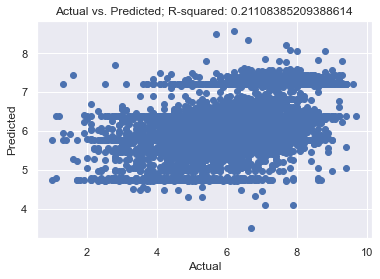

In [57]:
X_train, X_test, y_train, y_test = regression_category_selection('genres')
reg_model = Regression()
reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)


def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print("MAPE: ", mape)

sns.set()
plt.scatter(y_test, y_pred)
rsquared = r2_score(y_test, y_pred)
plt.title(f"Actual vs. Predicted; R-squared: {rsquared}")
plt.xlabel("Actual")
plt.ylabel("Predicted")

Text(0.5, 1.0, 'Box Plot of Genre and Average Rating')

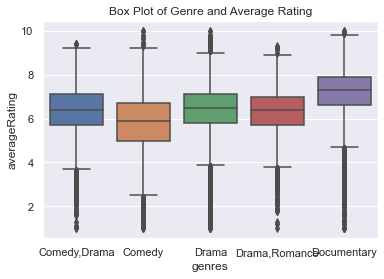

In [58]:
#BoxPlot
from collections import Counter
keys = dict(Counter(titles_m['genres'].values).most_common(5)).keys()
df_new = titles_m[titles_m['genres'].isin(keys)].copy()
sns.set()
sns.boxplot(x = df_new['genres'], y = df_new['averageRating'])
plt.title("Box Plot of Genre and Average Rating")


Text(0, 0.5, 'Count')

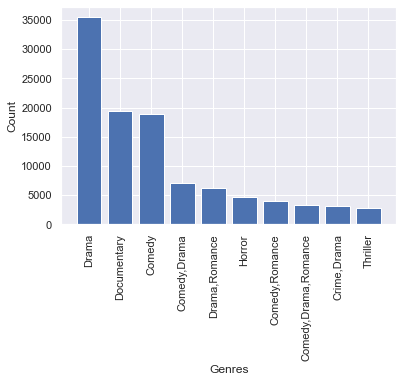

In [59]:

#BarPlot


genres = dict(Counter(titles_m['genres']).most_common(10))

genres_df = pd.DataFrame({'genres': list(genres.keys()),'Count':list(genres.values())})

plt.bar(genres_df['genres'], genres_df['Count'])
plt.xticks(rotation= 90)
plt.xlabel('Genres')
plt.ylabel('Count')



In [60]:
#Scatter

sns.set()
plt.scatter( df_append['averageRating'],df_append['numVotes'])
plt.ylabel('Number of Votes')
plt.xlabel('Average Rating')
plt.title("Genre vs. Number of Votes")


NameError: name 'df_append' is not defined